<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Машинное обучение

### Лекция 9. Композиции классификаторов

<br />
<br />
12 ноября 2021

### Пятиминутка

1. Выпишите функцию потерь в классическом варианте SVM
2. Приведите пример, когда подбор ядра радикально увеличивает качество линейной классификации
3. Какие недостатки есть у SVM?


https://ml-handbook.ru/chapters/ensembles/intro

<div align="center">
    <img src="images/ensemble_ml.jpg" alt="ensemble_ml" />
</div>

### Определение композиции

$X^\ell = (x_i, y_i)^\ell_{i=1} \subset X \times Y$ — обучающая выборка, $y_i = y^*(x_i)$

$a(x) = C(b(x))$ − алгоритм, где

$b: X \to {R}$ — базовый алгоритм (алгоритмический оператор)

$C: {R} \to Y$ — решающее правило (composition)

${R}$ — пространство оценок


#### Определение
Композиция базовых алгоритмов $b_1, \dots, b_T$

$a(x) = C(F(b_1(x), \dots, b_T(x)))$

где $F: R^T \to R$ – корректирующая операция

----

Зачем вводится $R$?

В задачах классификации множество отображений $\{F: R^T \to R\}$ существенно шире, чем $\{F: Y^T \to Y\}$.


### Примеры пространств оценок и решающих правил

 * **Пример 1**: классификация на 2 класса, $Y = \{-1, +1\}$:

 $a(x) = \text{sign}(b(x))$
 
где $R = \mathbb{R}, b: X \to \mathbb{R}, C(b) = \text{sign}(b)$

 * **Пример 2**: классификация на $M$ классов $Y = \{1,\dots, M\}$:

 $a(x) = \arg\max\limits_{y \in Y} b_y(x)$

где $R = \mathbb{R}^M, b: X \to \mathbb{R}^M, C(b_1, \dots, b_M) \equiv \arg \max\limits_{y \in Y} b_y$

 * **Пример 3**: регрессия, $Y = R = \mathbb{R}$
 
 $C(b) \equiv b$ — решающее правило не нужно


### Примеры композиций (корректирующих операций)

 * **Пример 1**: Простое голосование (Simple Voting)

 $F(b_1(x),\dots, b_T(x)) = \frac{1}{T} \sum\limits_{t=1}^T b_t(x), x \in X$

 * **Пример 2**: Взвешенное голосование (Weighted voting)
 
 $F(b_1(x),\dots, b_T(x)) = \sum\limits_{t=1}^T \alpha_tb_t(x), x \in X, \alpha_t \in \mathbb{R}$
 
 * **Пример 3**: Смесь алгоритмов (Mixture of Experts)

 $F(b_1(x),\dots, b_T(x)) = \sum\limits_{t=1}^T g_t(x)b_t(x), x \in X, \\ g_t: X \to \mathbb{R}$


### Стохастические методы построения композиций

Чтобы алгоритмы в композиции были различными
 * их обучают по (случайным) подвыборкам
   - bagging = bootstrap aggregation. [Breiman, 1996]: подвыборки длины $\ell$ с повторениями. Доля объектов, попадающих в выборку $\left( 1 - \frac{1}{e}\right) \approx 0.632$
 * либо по (случайным) подмножествам признаков
   - RSM = random subspace method, [Ho, 1998]


<div align="center">
    <img src="images/bagging_visualization.jpg" alt="bagging_visualization" width=1000/>
</div>

## Бустинг

https://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

<div align="center">
    <img src="images/gbt_visaulization.jpg" alt="gbt_visaulization" width=800/>
</div>

![boosting](https://ml-handbook.ru/chapters/ensembles/images/boosting.png)

### Бустинг для задачи классификации с двумя классами

Возьмём $Y = \{\pm 1\}, b_t: X \to \{-1, \color{red}{[0]}, +1\}, C(b) = \text{sign}(b)$

**Взвешенное голосование**

 $a(x) = \text{sign}\left( \sum\limits_{t=1}^T \alpha_t b_t (x) \right), x \in X$

**Функционал качества** композиции — число ошибок на $X^\ell$

 $Q_T = \sum\limits_{i=1}^\ell \left[y_i \sum\limits_{t=1}^T \alpha_t b_t(x_i) < 0 \right] $

**Две основные эвристики бустинга**:
 * фиксация $\alpha_1 b_1(x), \dots, \alpha_{t-1} b_{t-1}(x)$ при добавлении $\alpha_{t}b_t(x)$
 * гладкая аппроксимация пороговой функции потерь $[M < 0]$


### Гладкие аппроксимации пороговой функции потерь $[M<0]$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5.5, 5.5, num=100)
acc_loss = x < 0
V_M = (1 - x) * ((1 - x) > 0)
H_M = acc_loss * (-x)
L_M = np.log2(1 + np.exp(-x))
Q_M = (1 - x)**2
c, s = 0.25, 5.0
G_M = np.exp(-c * x * (x + s))
S_M = 2 * (1 + np.exp(x))**(-1)
E_M = np.exp(-x)

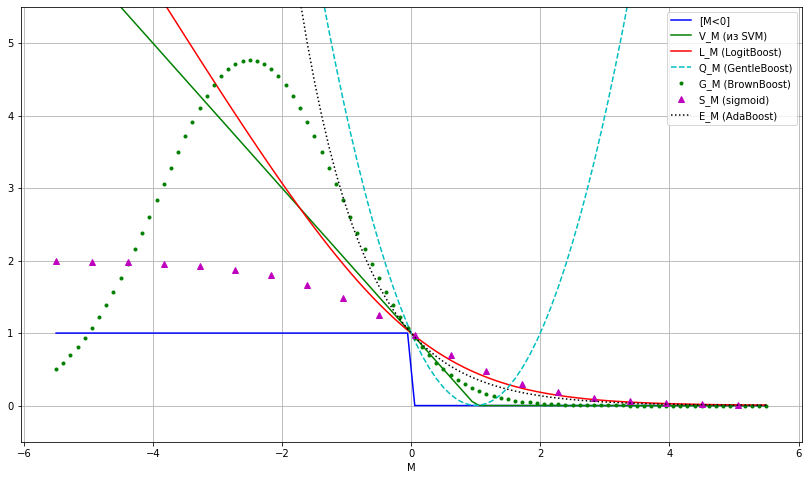

In [9]:
fig, ax = plt.subplots()

ax.set_xlabel('M')
ax.plot(x, acc_loss, 'b', label='[M<0]')
ax.plot(x, V_M, 'g', label='V_M (из SVM)')
ax.plot(x, L_M, 'r', label='L_M (LogitBoost)')
ax.plot(x, Q_M, '--c', label='Q_M (GentleBoost)')
ax.plot(x, G_M, '.g', label='G_M (BrownBoost)')
ax.plot(x[::5], S_M[::5], '^m', label='S_M (sigmoid)')
ax.plot(x, E_M, 'k:', label='E_M (AdaBoost)')

ax.set_ylim(-0.5, 5.5)
ax.grid(True)
fig.set_size_inches(14, 8)
plt.legend(loc='best')

### Экспоненциальная аппроксимация пороговой функции потерь

Оценка функционала качества $Q_T$ сверху:

 $Q_T \leq \tilde Q_T = \sum\limits_{i=1}^\ell \underbrace{\exp(-y_i \sum\limits_{t=1}^{T-1} \alpha_t b_t (x_i))}_{w_i} \exp(-y_i \alpha_T b_T (x_i))$

Нормированные веса: $\tilde W^\ell = (\tilde w_1, \dots, \tilde w_\ell), \tilde w_i = w_i / \sum_{j=1}^\ell w_j$

Взвешенное число ошибочных (negative) и правильных (positive) классификаций при векторе весов $U^\ell = (u_1, \dots, u_\ell)$:

 $N(b, U^\ell) = \sum\limits_{i=1}^\ell u_i [b(x_i) = -y_i]$

 $P(b, U^\ell) = \sum\limits_{i=1}^\ell u_i [b(x_i) = y_i]$

 $1 - N - P$ — взвешенное число отказов от классификации
 

### Классический вариант AdaBoost

Пусть отказов нет, $b_t: X \to \{\pm 1 \}$. Тогда $P = 1 − N$.

**Теорема (Freund, Schapire, 1995)**

Пусть для любого нормированного вектора весов $U^\ell$ существует алгоритм $b \in B$, классифицирующий выборку хотя бы немного лучше, чем наугад: $N(b, U^\ell) < \frac12$.

Тогда минимум функционала $\tilde Q_T$ достигается при

 $b_T = \arg\min\limits_{b \in B} N (b, \tilde W^\ell)$

 $\alpha_T = \frac12 \ln\frac{1-N(b_T, \tilde W^\ell)}{N(b_T, \tilde W^\ell)}$


### Алгоритм AdaBoost

**Вход**: обучающая выборка $X^\ell$, <span style="color:red">параметр $Т$</span>

**Выход**: базовые алгоритмы и их веса $\alpha_t b_t, t = 1, \dots, T$

1. инициализировать веса объектов: $w_i = \frac{1}{\ell}, i = 1, \dots, \ell$

2. **для всех** $t = 1, \dots, \color{red}{T}$

3. обучить базовый алгоритм:

 $b_t = \arg \min\limits_b N(b, W^\ell)$

4. $\alpha_t = \frac12 \ln \frac{1-N(b, W^\ell)}{N(b, W^\ell)}$

5. обновить веса объектов:

 $w_i = w_i \exp(-\alpha_t y_i b_t(x_i)), \\ i = 1, \dots, \ell$

6. нормировать веса объектов:

 $w_0 = \sum\limits_{j=1}^\ell w_j \\ w_i = w_i / w_0,\ i = 1, \dots, \ell$


### Эвристики и рекомендации

 * **Базовые классификаторы (weak classifiers)**
   - решающие деревья — используются чаще всего
   - пороговые правила (data stumрѕ) 
   
   $B = \{b(x) = [f_j(x) \lessgtr\theta] | j = 1, \dots, n, \theta \in \mathbb{R}\}$
   
   - для SVM бустинг обычно не эффективен
   
 * **Отсев шума**: отбросить объекты с наибольшими $w_i$
 
 * **Дополнительный критерий остановки**: увеличение частоты ошибок на контрольной выборке


<div class="alert alert-info">
<b>Вопрос 1:</b> Почему бустинг работает?
</div>

<div class="alert alert-info">
<b>Вопрос 2:</b> Какие недостатки у AdaBoost?
</div>

### Недостатки AdaBoost

 * Чрезмерная чувствительность к выбросам из-за $e^M$
 * AdaBoost строит «чёрные ящики» — громоздкие неинтерпретируемые композиции из сотен алгоритмов
 * Требуются достаточно большие обучающие выборки (бэггинг обходится более короткими)
 
**Способы устранения**:
 * Другие аппроксимации пороговой функции потерь
 * Непрерывные вещественные базовые алгоритмы $b_t: X \to \mathbb{R}$
 * Явная оптимизация отступов, без аппроксимации
 * Менее жадные стратегии наращивания композиции


### Градиентный бустинг для произвольной функции потерь

Линейная (выпуклая) комбинация базовых алгоритмов:

$a(x) = \sum\limits_{t=1}^T \alpha_t b_t(x), \ x \in X, \ \alpha_t \in \mathbb{R}_+$

Функционал качества с произвольной функцией потерь $\mathcal{L}(a, y)$

$Q(\alpha, b, X^\ell) = \sum\limits_{i=1}^\ell \mathcal{L} \underbrace{\underbrace{(\sum\limits_{t=1}^{T-1} \alpha_t b_t(x_i)}_{f_{T-1,i}} + \alpha b(x_i)}_{f_{T,i}} , y_i) \to \min\limits_{\alpha, b} $

$f_{T-1, i}$ — текущее приближение

$f_{T, i}$ — следующее приближение

----

Friedman G. Greedy Function Approximation: A Gradient Boosting Machine. 1999.


### Параметрическая аппроксимация градиентного шага

Градиентный метод минимизации $Q(f) \to \min, f \in \mathbb{R}^\ell$:

 $f_0 = $ начальное приближение
 
 $f_{T,i} = f_{T-1,i} - \alpha g_i, \ i = 1, \dots, \ell$
 
 $g_i = \mathcal{L}^\prime (f_{T-1, i}, y_i)$ — компоненты вектора градиента, $\alpha$ — градиентный шаг.
 
<span style="color:red"> Наблюдение: это очень похоже на одну итерацию бустинга!</span>

 $f_{T,i} = f_{T-1,i} + \alpha b(x_i), \ i = 1, \dots, \ell$

**Идея**: будем искать такой базовый алгоритм $b_T$, чтобы вектор $(b_T(x_i))_{i=1}^\ell$ приближал вектор антиградиента $(-g_i)_{i=1}^\ell$

 $$b_T = \arg\min\limits_b \sum\limits_{i=1}^\ell (b(x_i) + g_i)^2$$

### Алгоритм градиентного буcтинга (Gradient Boosting)

**Вход**: обучающая выборка $X^\ell$, <span style="color:red">параметр $Т$</span>

**Выход**: базовые алгоритмы и их веса $\alpha_t b_t, t = 1, \dots, T$

1. инициализация: $f_i = 0, i = 1, \dots, \ell$

2. **для всех** $t = 1, \dots, \color{red}{T}$

3. базовый алгоритм, приближающий антиградиент:

 $b_t = \arg \min\limits_b \sum\limits_{i=1}^\ell (b(x_i) + \mathcal{L}^\prime(f_i, y_i))^2$

4. задача одномерной минимизации: $\alpha_t = \arg \min\limits_{\alpha > 0} \sum\limits_{i=1}^\ell
 \mathcal{L}(f_i + \alpha b_t(x_i), y_i)$

5. обновление вектора значений на объектах выборки:

 $f_i = f_i + \alpha_t b_t(x_i)), i = 1, \dots, \ell$


### Стохастический градиентный бустинг (SGB)

**Идея**: на шагах 3-5 использовать не всю выборку $X^\ell$, а случайную подвыборку без возвращений.

**Преимущества**:
 * улучшается качество
 * улучшается сходимость
 * уменьшается время обучения
 
 ----
 
 _Friedman G._ Stochastic Gradient Boosting, 1999.

<div class="alert alert-info">
<b>Вопрос 3:</b> Почему всё так идеально?
</div>

### Регрессия и AdaBoost

**Регрессия**: $\mathcal{L}(a,y) = (a-y)^2$
 * $b_T(x)$ обучается на разностях $y_i - \sum\limits_{t=1}^{T-1} \alpha_t b_t (x_i)$
 * если регрессия линейная, то $\alpha_t$ можно не обучать
 
**Классификация**: $\mathcal{L}(a,y) = e^{-ay}, b_t \in \{-1, 0 , +1\}$
 * GB в точности совпадает с AdaBoost
 

### ХGBoost — популярная и быстрая реализация GB над деревьями

Деревья регрессии и классификации (CART):

$b(x) = \sum\limits_{j=1}^J w_j [x \in R_j]$,

где $R_j$ — область пространства, покрываемая листом $j, w_j$ — веса листьев, $Ј$ — число листьев в дереве.

Функционал качества с суммой $L_0, L_1, L_2$ регуляризаторов:

$Q(b, \{w_j\}_{j=1}^J, X^\ell) = \sum\limits_{i=1}^\ell \mathcal{L} \left(\sum\limits_{t=1}^{T-1} \alpha_t b_t(x_i) +
\alpha b(x_i, y_i)\right) + \gamma \sum\limits_{j=1}^J [w_j \neq 0] + \mu \sum\limits_{j=1}^J |w_j| + \frac{\lambda}{2} \sum\limits_{j=1}^J w_j^2 \to \min\limits_{b, \{w_j\}}$

По $w_j$ задача имеет аналитическое решение.

----

Ещё популярные реализации градиентного бустинга над случайными деревьями: LightGBM, CatBoost


### Резюме по бустингу

 * Композиции позволяют решать сложные задачи, которые плохо решаются отдельными алгоритмами
 * Обучать композицию целиком слишком сложно. Поэтому обучаем базовые алгоритмы по одному
 * Важное открытие середины 90-х: обобщающая способность бустинга не ухудшается с ростом сложности $Т$
 * Градиентный бустинг — наиболее общий из всех бустингов:
    - произвольная функция потерь
    - произвольное пространство оценок $R$
    - подходит для регрессии, классификации, ранжирования
 * Стохастический вариант SGB — лучше и быстрее
 * Чаще всего GB применяется к решающим деревьям
 * Градиентный бустинг над Oblivious Decision Trees = Catboost (раньше был Yandex.MatrixNet)

### Сравнение: boosting — bagging — RSM

 * Бустинг лучше для больших обучающих выборок и для классов с границами сложной формы
 * Бэггинг и RSM лучше для коротких обучающих выборок 
 * RSM лучше в тех случаях, когда признаков больше, чем объектов, или когда много неинформативных признаков
 * Бэггинг и RSM эффективно распараллеливаются, бустинг выполняется строго последовательно
 
 <div align="center">
    <img src="images/bootstrap.png" alt="bootstrap" width=800/>
</div>
 
 https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205


### Случайный лес (Random forest)

Обучение случайного леса:
 * бэггинг над решающими деревьями, без pruning
 * признак в каждой вершине дерева выбирается из случайного подмножества $k$ из $n$ признаков


------

Подбор числа деревьев $T$ можно делать по критерию out-of-bag: число ошибок на объектах $x_i$, если не учитывать голоса деревьев, для которых $x_i$ был обучающим:

$\text{out-of-bag}(a) = \sum\limits_{i=1}^\ell \left[\text{sign}(\sum\limits_{t=1}^T [x_i \notin U_t] b_t(x_i)) \neq y_i \right] \to \min$

Это несмещенная оценка обобщающей способности.


### Спасибо за внимание!

### Обоснование бустинга

Усиление понятия частоты ошибок алгоритма $a(x) = \text{sign}(b(x))$

$\nu_\theta (a, X^\ell) = \frac{1}{\ell} \sum\limits_{i=1}^\ell [b(x_i) y_i \leq \theta]$

Обычная частота ошибок $\nu_0 (a, X^\ell) \leq \nu_\theta (a, X^\ell)$ при $\theta > 0$

**Теорема (Freund, Schapire, Bartlett, 1998)**

Если $|B| < \infty$, то $\forall \theta > 0, \forall \eta \in (0,1)$ с вероятностью $1-\eta$

 $P[y a(x) < 0] \leq \nu_\theta (a, X^\ell) + C\sqrt{\frac{\ln |B| \ln \ell}{\ell\theta^2} + \frac{1}{\ell}\ln \frac{1}{\eta}}$

**Основной вывод**: оценка зависит от $|B|$, но не от $Т$. 

Голосование не увеличивает сложность эффективно используемого множества алгоритмов.


### Обоснование бустинга: что же всё-таки происходит?

**Распределение отступов**: доля объектов, имеющих отступ меньше заданного $\theta$ после 5, 100, 1000 итераций (задача классификации UCI:vehicle)

<div align="center">
    <img src="images/boosting_exp.jpg" alt="logo_fmkn" width=600 />
</div>

 * С ростом $Т$ распределение отступов сдвигается вправо, то есть буcтинг «раздвигает» классы в пространстве векторов растущей размерности $(b_1(x), \dots, b_T(x))$
 * Значит, в оценке можно уменьшить второй член, увеличив $\theta$ и не изменив $\nu_\theta (a, X^l)$
 * Можно уменьшить второй член, если уменьшить |В|, то есть взять простое семейство базовых алгоритмов
